## Alexnet w/ Stanford Cars Dataset (196 Classes)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization

from tensorflow.keras.optimizers import SGD

In [3]:
train_path = '/content/gdrive/MyDrive/Kaggle_StanfordCars/car_data/car_data/train'
test_path = '/content/gdrive/MyDrive/Kaggle_StanfordCars/car_data/car_data/test'

In [4]:
gen_params = {"rescale":1.0/255,
              "featurewise_center":False,
              "samplewise_center":False,
              "featurewise_std_normalization":False,
              "samplewise_std_normalization":False,
              "zca_whitening":False,
              "rotation_range":20,
              "width_shift_range":0.1,
              "height_shift_range":0.1,
              "shear_range":0.2,
              "zoom_range":0.1,
              "horizontal_flip":True,
              "fill_mode":'constant',
              "cval": 0,
              "validation_split":0.25}

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)


## Data generator for training images
train_generator = train_datagen.flow_from_directory(train_path,
                                                    class_mode='categorical', batch_size = 32,
                                                    target_size=(224,224),color_mode='rgb',shuffle = True,subset='training')

val_generator = train_datagen.flow_from_directory(train_path,
                                                    class_mode='categorical', batch_size = 32, 
                                                    target_size=(224,224),color_mode='rgb',shuffle = True,subset='validation')

test_generator = test_datagen.flow_from_directory(test_path,
                                                    class_mode='categorical', batch_size = 32,
                                                    target_size=(224,224),color_mode='rgb',shuffle = True)

Found 6179 images belonging to 196 classes.
Found 1965 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


<a id='implementation'></a>
# Implementation

In [5]:
model = Sequential(name="Alexnet_StanfordCars")
model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', input_shape = (224,224,3)))
model.add(Activation('relu'))  
model.add(MaxPool2D(pool_size=(3,3), strides= (2,2), padding='valid'))
model.add(BatchNormalization())
    
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
            
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
        
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
            
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))
                           
model.add(Dense(units = 196, activation = 'softmax'))

model.summary()

Model: "Alexnet_StanfordCars"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 25

In [6]:
# set the SGD optimizer with lr of 0.01 and momentum of 0.9
optimizer = SGD(lr = 0.01, momentum = 0.9)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [7]:
model_name = "alexnet_cars_2.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%4 == 0 and epoch!= 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [8]:
# train the model
batch = 128
num_epochs = 100

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs=num_epochs,
                    verbose=1,
                    batch_size=batch,
                    callbacks=[early_stop,monitor,lr_schedule])

Epoch 1/100
194/194 [==============================] - 142s 700ms/step - loss: 7.1732 - accuracy: 0.0065 - val_loss: 5.3148 - val_accuracy: 0.0127
Epoch 2/100
194/194 [==============================] - 134s 689ms/step - loss: 5.3637 - accuracy: 0.0071 - val_loss: 5.2695 - val_accuracy: 0.0061
Epoch 3/100
194/194 [==============================] - 134s 691ms/step - loss: 5.3076 - accuracy: 0.0088 - val_loss: 5.2169 - val_accuracy: 0.0102
Epoch 4/100
194/194 [==============================] - 135s 694ms/step - loss: 5.2680 - accuracy: 0.0101 - val_loss: 5.2046 - val_accuracy: 0.0132
Epoch 5/100
194/194 [==============================] - 133s 687ms/step - loss: 5.2338 - accuracy: 0.0147 - val_loss: 5.1679 - val_accuracy: 0.0148
Epoch 6/100
194/194 [==============================] - 134s 688ms/step - loss: 5.1388 - accuracy: 0.0155 - val_loss: 5.1497 - val_accuracy: 0.0122
Epoch 7/100
194/194 [==============================] - 133s 688ms/step - loss: 5.0897 - accuracy: 0.0229 - val_loss: 5

<a id='analyze'></a>
# Analyze training history

In [9]:
max(history.history['accuracy'])

0.05502508580684662

In [10]:
max(history.history['val_accuracy'])

0.03664122149348259

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

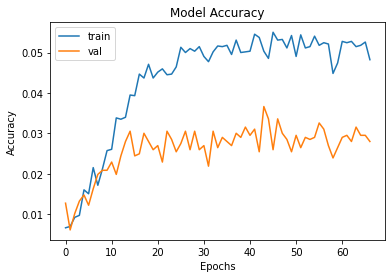

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<a id='prediction'></a>
# Prediction

In [12]:
print(model_name)

alexnet_cars_2.h5


In [13]:
model.load_weights(model_name)
metrics = model.evaluate(test_generator)

252/252 [==============================] - 2171s 9s/step - loss: 5.0365 - accuracy: 0.0295
